<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['revenue', 'cost', 'datacost'], dtype='object')


,net($),davgn($),gross($),davgg($),wmrgn(%),dg1wk(%),dn1wk(%),dg52w(%),dn52w(%)
yyww,,,,,,,,,
1701,42719,6102,160074,22867,26.69,0.00,0.00,0.00,0.00
1702,50793,7256,187628,26804,27.07,18.90,17.21,0.00,0.00
1703,58537,8362,215770,30824,27.13,15.25,15.00,0.00,0.00
1704,68547,9792,256407,36629,26.73,17.10,18.83,0.00,0.00
1705,68888,9841,260711,37244,26.42,0.50,1.68,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1833,108644,15520,284637,40662,38.17,10.79,6.07,59.96,13.34
1834,121912,17416,315520,45074,38.64,12.21,10.85,51.03,3.25
1835,84663,12094,227681,32525,37.18,-30.55,-27.84,11.40,-14.73


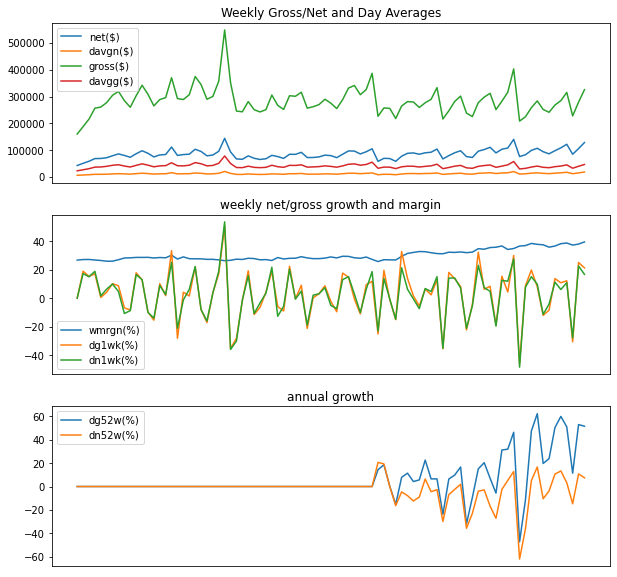

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SIMILAR DATA UPLOADED TO S3 + transformed time (yyww) and segment information
data = pd.read_csv('https://farius.s3.us-east-2.amazonaws.com/wcd/final/S3.csv')

result = data[data['segment']!='Segment B'][['yyww','revenue',\
         'cost', 'datacost']].groupby(['yyww']).sum().astype(int)
print(result.columns)
result['davgn($)']=(result['revenue']/7).astype(int)
result['gross']=result['revenue']+result['cost']+result['datacost'].astype(int)
result['davgg($)']=((result['revenue']+result['cost']+result['datacost'])/7).\
                   astype(int)
result['wr_01']=result['revenue'].astype(int).shift(1).fillna(0)
result['wc_01']=result['cost'].astype(int).shift(1).fillna(0)
result['wd_01']=result['datacost'].astype(int).shift(1).fillna(0)
result['wr_52']=result['revenue'].astype(int).shift(52).fillna(0)
result['wc_52']=result['cost'].astype(int).shift(52).fillna(0)
result['wd_52']=result['datacost'].astype(int).shift(52).fillna(0)
result['wmrgn(%)']=round(result['revenue']/(result['revenue']+\
                   result['cost']+result['datacost'])*100, 2)
result['dg1wk(%)']=np.where(result['wr_01']==0,0,\
              round((result['revenue']-result['wr_01'])/result['wr_01']*100,2))
result['dn1wk(%)']=np.where(result['wr_01']+result['wc_01']+\
                   result['wd_01']==0,0, round((result['revenue']+\
                   result['cost']+result['datacost']-result['wr_01']-\
                   result['wc_01']-result['wd_01'])/(result['wr_01']+\
                   result['wc_01']+result['wd_01'])*100,2))
result['dg52w(%)']=np.where(result['wr_52']==0,0,\
                   round((result['revenue']-result['wr_52'])\
                   /result['wr_52']*100,2))
result['dn52w(%)']=np.where(result['wr_52']+result['wc_52']+\
                   result['wd_52']==0,0, round((result['revenue']+\
                   result['cost']+result['datacost']-result['wr_52']-\
                   result['wc_52']-result['wd_52'])/(result['wr_52']+\
                   result['wc_52']+result['wd_52'])*100,2))

visual = result.rename(columns={"revenue": "net($)", "gross": "gross($)"}).\
         drop(['cost', 'datacost', 'wr_01', 'wc_01', 'wd_01', 'wr_52', 'wc_52',\
         'wd_52'], axis=1).drop([1752, 1801, 1838])

display(visual)

fig, axes = plt.subplots(nrows=3, ncols=1)

visual.reset_index().plot(ax=axes[0], y=['net($)', 'davgn($)', 'gross($)',\
  'davgg($)'], title=('Weekly Gross/Net and Day Averages'),figsize=(10, 10),\
  fontsize=10, kind='line').axes.get_xaxis().set_visible(False);
visual.reset_index().plot(ax=axes[1], y=['wmrgn(%)', 'dg1wk(%)', 'dn1wk(%)'], \
  title ='weekly net/gross growth and margin', figsize=(10, 10), fontsize=10,\
  kind='line').axes.get_xaxis().set_visible(False);
visual.reset_index().plot(ax=axes[2], y=['dg52w(%)', 'dn52w(%)'], \
  title = 'annual growth', figsize=(10, 10), fontsize=10, kind='line')\
  .axes.get_xaxis().set_visible(False);